# ML@NERSC 2024 Survey Analysis

This notebook contains the plotting code for the ML@NERSC 2024 survey results.

To get started, download the responses spreadsheet as a tab-separated file (TSV) and put it in this directory.

ML@NERSC 2024 responses: https://docs.google.com/spreadsheets/d/11kAePJIvJWABT8DYkYL1biStwiqlnbLMIuiTXbMxvyk

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
def split_multi_response(x):
    """Splits a multiple checkbox answer column into single flattened Series"""
    x = x.dropna()
    return x.apply(lambda x: [s.strip() for s in x.split(',')]).explode()

In [3]:
# Global settings
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams['figure.figsize'] = (9.0, 6.0)
plt.rcParams['font.size'] = 16.0

## Load the data

In [4]:
data = pd.read_csv('ML@NERSC User Survey 2024 (Responses) - Form Responses 1.tsv', sep='\t')

In [5]:
data.shape

(202, 44)

In [6]:
data.head()

,Timestamp,How do you rate your expertise in Machine Learning?,What science domains are you using ML for?,Any publications that you would like to share with us (Optional),Email (Optional),What frameworks/tools are you using?,Where do you run your ML models? [My own laptop or development box],Where do you run your ML models? [NERSC],Where do you run your ML models? [Other HPC center(s)],Where do you run your ML models? [University/Group cluster],...,What ML software installation setup do you use at NERSC (if relevant)?,How well does the ML software stack at NERSC satisfy your needs?,"How satisfied are you with NERSC's ML user support (documentation, help tickets, training events)?","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Installing/using software]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Application performance]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting interactive resources for development/testing]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Submitting jobs]","For your ML workloads at NERSC, what are your biggest pain points? Please rate your level of concern or challenges with the following: [Getting jobs through the queues]",Are there any other aspects of running your ML workload at NERSC that you find challenging?,Do you have any other comments or suggestions to improve the suitability of NERSC resources for Machine Learning?
0,3/28/2024 13:29:21,7.0,"Computer Science, Earth and Environmental Science",NaN,NaN,"PyTorch, TensorFlow, Keras",NaN,Training,NaN,"Training, Inference",...,"NERSC modules (TensorFlow, PyTorch, Anaconda),...",7.0,6.0,No challenge or concern,Somewhat challenging,No challenge or concern,No challenge or concern,No challenge or concern,NaN,NaN
1,3/28/2024 13:30:25,4.0,"Astrophysics, Cosmology",NaN,NaN,"TensorFlow, JAX",NaN,"Training, Inference","Training, Inference","Training, Inference",...,NaN,4.0,4.0,Somewhat challenging,No challenge or concern,No challenge or concern,No challenge or concern,Highly challenging,NaN,NaN
2,3/28/2024 13:31:08,4.0,Earth and Environmental Science,NaN,NaN,TensorFlow,NaN,"Training, Inference",NaN,Training,...,"NERSC modules (TensorFlow, PyTorch, Anaconda),...",6.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,No challenge or concern,NaN,NaN
3,3/28/2024 13:32:28,4.0,Earth and Environmental Science,https://arxiv.org/abs/2306.08754 https://arxiv...,jerryL9@uci.edu,"TensorFlow, Keras",NaN,NaN,"Training, Inference",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"I don't use NERSC at the moment, may switch in...","I don't use NERSC at the moment, may switch in..."
4,3/28/2024 13:34:04,6.0,"Biosciences, Chemistry, Earth and Environmenta...",NaN,NaN,"PyTorch, TensorFlow, JAX, Keras",Inference,"Training, Inference","Training, Inference",NaN,...,Build from source,3.0,5.0,No challenge or concern,Somewhat challenging,Somewhat challenging,No challenge or concern,No challenge or concern,NaN,NaN


In [7]:
# View all the questions (columns) by index, for reference
pd.Series(data.columns)

0                                             Timestamp
1     How do you rate your expertise in Machine Lear...
2            What science domains are you using ML for?
3     Any publications that you would like to share ...
4                                      Email (Optional)
5                  What frameworks/tools are you using?
6     Where do you run your ML models? [My own lapto...
7              Where do you run your ML models? [NERSC]
8     Where do you run your ML models? [Other HPC ce...
9     Where do you run your ML models? [University/G...
10             Where do you run your ML models? [Cloud]
11             Where do you run your ML models? [Other]
12      What hardware do you run your models on? [CPUs]
13      What hardware do you run your models on? [GPUs]
14      What hardware do you run your models on? [TPUs]
15     What hardware do you run your models on? [FPGAs]
16     What hardware do you run your models on? [Other]
17    If you answered "Other" on the above, or i

## How do you rate your experience in ML?

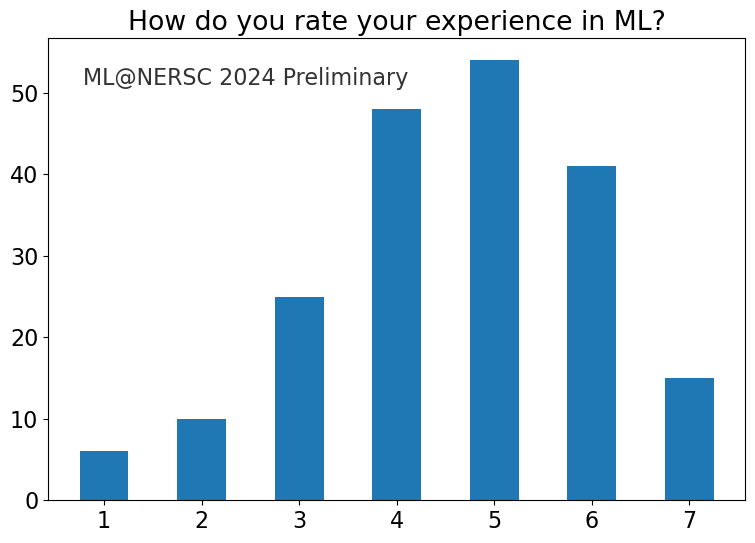

In [8]:
fig, ax = plt.subplots()
ax.hist(data.iloc[:,1], bins=13, range=(0.75,7.25))
ax.set_title('How do you rate your experience in ML?')
plt.text(0.05, 0.9, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## What science domains are you using ML for?

In [9]:
# Select the appropriate column
responses = data.iloc[:,2]

# Split responses
domains = split_multi_response(responses)

# Get unique response counts
domain_counts = domains.value_counts(ascending=True)
domain_counts

What science domains are you using ML for?
                                                     1
Materials Research                                   1
Materials                                            1
plasma and accelerator physics                       1
Atmospheric Science                                  1
Networking                                           1
Plasma physics and optics                            1
Material Science                                     1
Condensed Matter Physics                             1
Spatial statistics                                   1
see the arxiv paper for the methods we are using     1
Plasma Physics                                       1
Materials Physics                                    1
Astroparticle physics                                1
Condensed Matter Physica                             1
Text and data-mining in the selected fields.         1
Planetary Science                                    1
Materials science and 

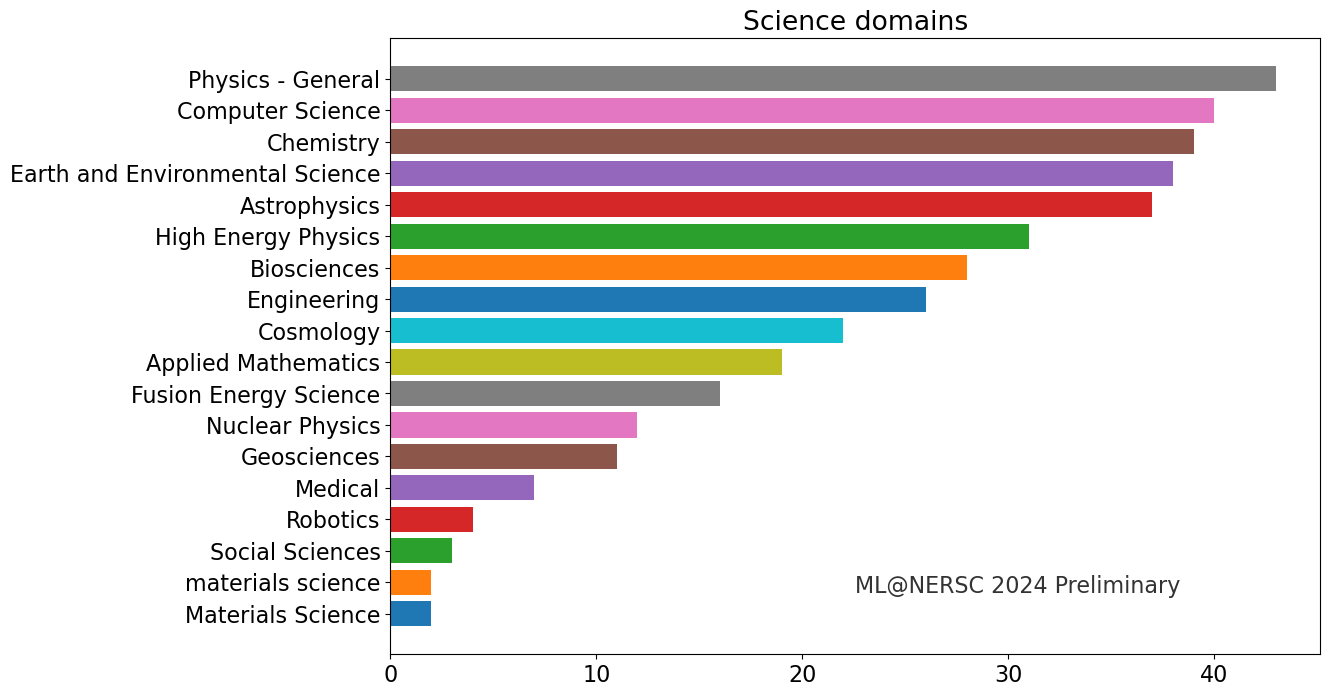

In [10]:
# Throw out rare responses
domain_counts = domain_counts[domain_counts > 1]

# Make the plot
fig, ax = plt.subplots(figsize=(12,8))

ax.barh(domain_counts.index, domain_counts, color=colors)
ax.set_title('Science domains')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## How does ML fit into your scientific workflow(s)?

In [11]:
data.columns[18]

'How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own description, include future plans)'

In [12]:
responses = data.iloc[:,18]

workflows = split_multi_response(responses)

# Simplify labels
workflows = workflows.str.replace(
    'Coupled ML+simulation (e.g. replacing DFT in a simulation loop)',
    'Coupled ML+simulation', regex=False)
workflows = workflows.str.replace(
    'Entire ML replacement of simulation',
    'ML replacing simulation')
workflows = workflows.str.replace(
    'ML for real-time ("online") experimental data',
    'ML for real-time experimental data', regex=False)
workflows = workflows.str.replace(
    'ML for real-time control of scientific instrument',
    'ML for control of scientific instrument')

workflow_counts = workflows.value_counts(ascending=True)
workflow_counts

How does ML fit into your scientific workflow(s)? (options are illustrative so please mark any that apply and feel free to add your own description, include future plans)
usually as a comparative method to some other statistical method                                                                                                                                                                                                                                                    1
ML for pattern recognition                                                                                                                                                                                                                                                                                          1
simulation                                                                                                                                                                                                       

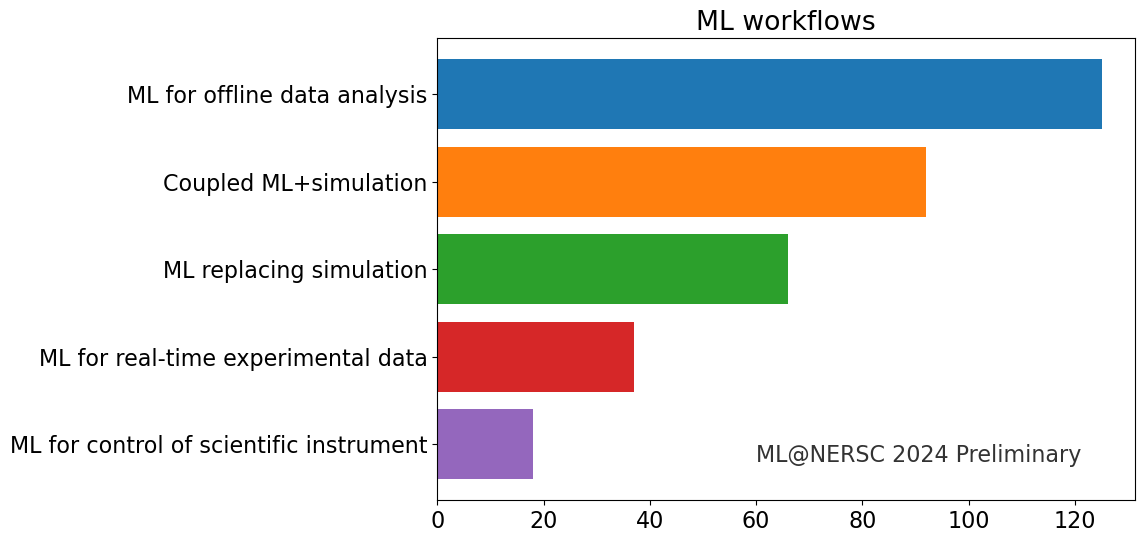

In [13]:
# Filter rare responses
workflow_counts = workflow_counts[workflow_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(workflow_counts.index, workflow_counts, color=colors[:len(workflow_counts)][::-1])
ax.set_title('ML workflows')
ax.text(60, -0.2, 'ML@NERSC 2024 Preliminary', alpha=0.8);

## What frameworks/tools are you using?

In [14]:
responses = data.iloc[:,5]
frameworks = split_multi_response(responses)

In [15]:
# Data cleanup, merging
frameworks[frameworks.str.contains('Flux')] = 'Flux'
frameworks[frameworks.str.contains('jax|flax|haiku', case=False)] = 'JAX'
frameworks[frameworks.str.contains('matlab', case=False)] = 'Matlab'

In [16]:
# Get unique response counts
framework_counts = frameworks.value_counts(ascending=True)
framework_counts

What frameworks/tools are you using?
RDKit                                                                                                      1
custom C++/C/CUDA and Java framework                                                                       1
DeepSpeed                                                                                                  1
Magtron LM                                                                                                 1
Matlab                                                                                                     1
R packages                                                                                                 1
including PySR/SymbolicRegression.jl                                                                       1
various Julia/Python packages                                                                              1
not sure                                                                                   

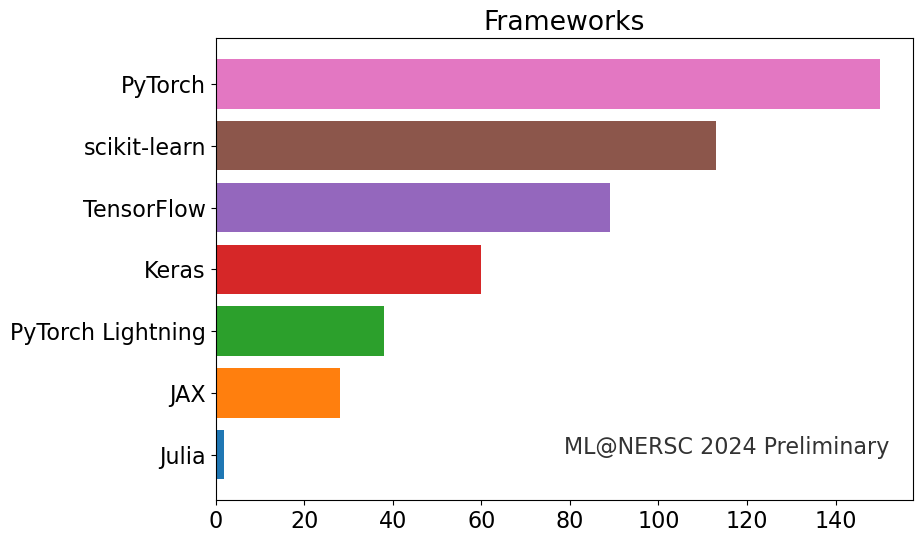

In [17]:
# Filter out rare responses
framework_counts = framework_counts[framework_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(framework_counts.index, framework_counts, color=colors)
ax.set_title('Frameworks')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## What types of ML tasks do you employ?

In [18]:
responses = data.iloc[:,20]
tasks = split_multi_response(responses)
tasks = tasks.str.replace('Unsupervised / self-supervised learning / clustering', 'Unsupervised / self-supervised')
task_counts = tasks.value_counts(ascending=True)
task_counts

What types of ML tasks do you employ?
model emulation                                                           1
Evolutionary algorithms                                                   1
Bayesian inference in high dimensions for highly non-linear problems      1
emulating spatial statistics                                              1
Symbolic Regression                                                       1
differentiable ML                                                         1
neural-ODEs                                                               1
Reinforcement learning                                                   25
Segmentation / object detection                                          42
Generative modeling                                                      82
Unsupervised / self-supervised                                          106
Classification                                                          111
Regression                                        

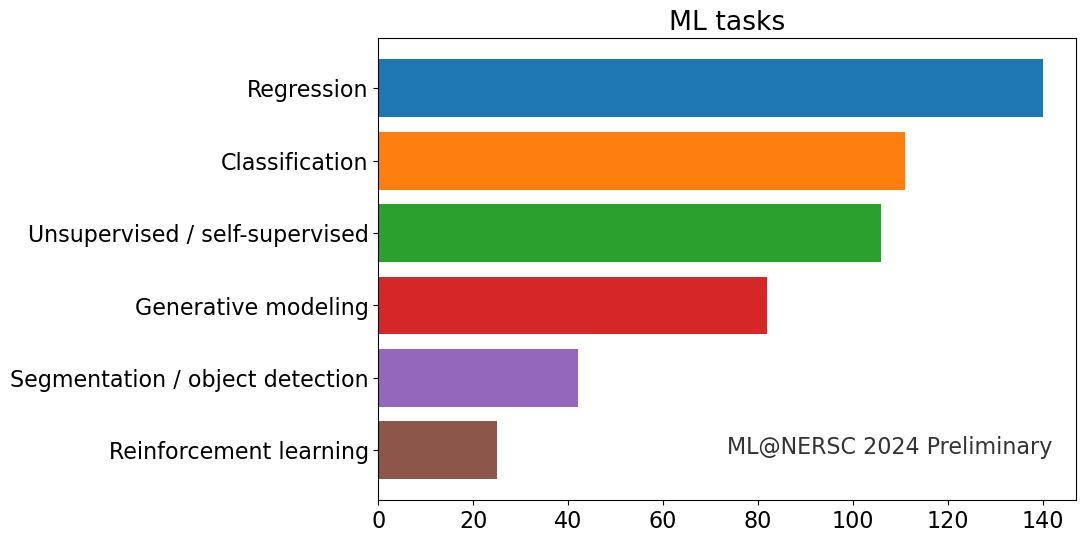

In [19]:
# Filter rare responses
task_counts = task_counts[task_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(task_counts.index, task_counts, color=colors[:len(task_counts)][::-1])
ax.set_title('ML tasks')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## What types of models are you using?

In [20]:
responses = data.iloc[:,21]

In [21]:
responses[3]

'Fully-connected / feed-forward Neural Networks (MLPs), heteroskedastic regression'

In [22]:
# Simplify responses before splitting (e.g. to remove commas)
rename_map = {
    'Traditional ML models (SVM, Random Forest, Decision Trees, Ensemble Methods, etc)': 'Traditional ML',
    'Fully-connected / feed-forward Neural Networks (MLPs)': 'Fully-connected Neural Networks',
    'Convolutional Neural Networks (CNNs)': 'Convolutional Neural Networks',
    'Recurrent Neural Networks (RNNs, GRUs, LSTMs)': 'Recurrent Neural Networks',
    'Attention models (e.g. Transformer, LLMs, BERT, GPT)': 'Transformers',
    'Graph or point-cloud Neural Networks': 'Graph/Point Neural Networks',
    'Diffusion models (DDPM, EDM, LDM)' : 'Diffusion models',
}

for k,v in rename_map.items():
    responses = responses.str.replace(k, v, regex=False)

In [23]:
models = split_multi_response(responses)

In [24]:
# Additional response cleanup
models[models.str.contains('flow', case=False)] = 'Flow-based models'
models[models.str.contains('gaussian|gpr', case=False)] = 'Gaussian Processes'
models[models.str.contains('equivariant|graph', case=False)] = 'Graph/Point Neural Networks'

In [25]:
model_counts = models.value_counts(ascending=True)
model_counts

What types of models are you using? (include current and future plans)
heteroskedastic regression                   1
Variational Autoencoders                     1
Autoencoder and Variational Autoencoder      1
Symbolic Regression                          1
SINDy                                        1
GNN                                          1
Quantum Machine Learning                     1
Gaussian Processes                           2
Diffusion models                            43
Recurrent Neural Networks                   50
Graph/Point Neural Networks                 73
Transformers                                85
Traditional ML                              99
Convolutional Neural Networks              117
Fully-connected Neural Networks            118
Name: count, dtype: int64

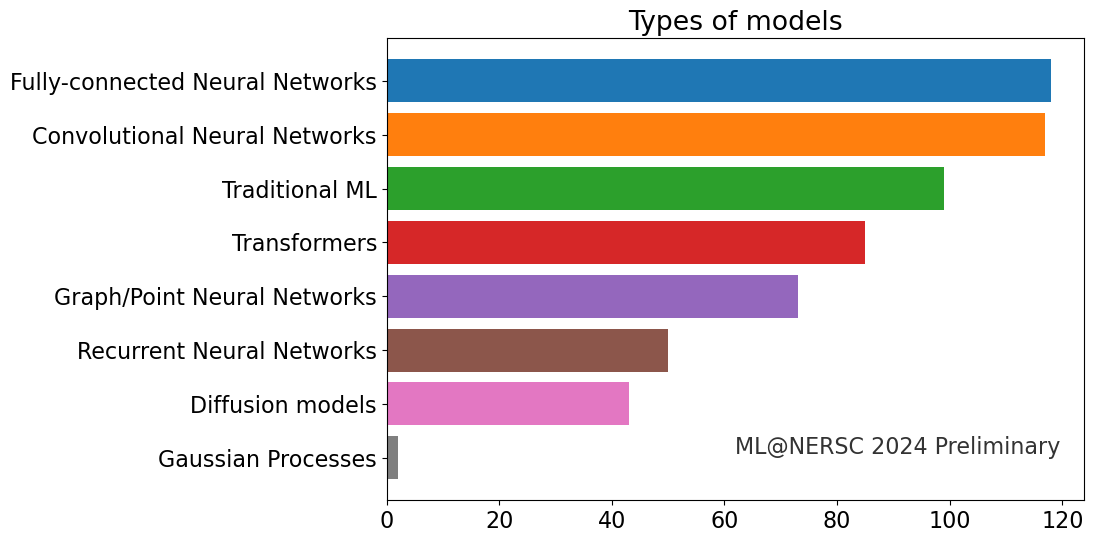

In [26]:
# Filter rare responses
model_counts = model_counts[model_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(model_counts.index, model_counts, color=colors[:len(model_counts)][::-1])
ax.set_title('Types of models')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## HPO

In [27]:
data.columns[23]

'Which hyperparameter optimization libraries are you using, if any?'

In [28]:
hpo = data.iloc[:,23]

In [29]:
hpo = split_multi_response(hpo)

In [30]:
hpo_counts = hpo.value_counts(ascending=True)
hpo_counts

Which hyperparameter optimization libraries are you using, if any?
Pseudo-random grid search coded in python                                                                         1
Hyppo                                                                                                             1
R packages                                                                                                        1
No                                                                                                                1
HyperOpt                                                                                                          1
Tunning based on specific problems                                                                                1
do it by myself                                                                                                   1
Deep Hyper                                                                                                        1
PyGAD

## How long does (or would) it take to train your models on a single device?

In [31]:
data.columns[24]

'How long does (or would) it take to train your models on a single device?'

In [32]:
responses = data.iloc[:,24]
traintime = split_multi_response(responses)

In [33]:
time_counts = traintime.value_counts(ascending=True)
time_counts

How long does (or would) it take to train your models on a single device?
It depends on the complexity of the model and problem. some models could take days and weeks to be fully trained      1
Depends how big it is                                                                                                 1
A few hours for one model                                                                                             1
but I need to train thousands of models                                                                               1
Months                                                                                                               18
Weeks                                                                                                                36
Minutes                                                                                                              53
Days                                                                                  

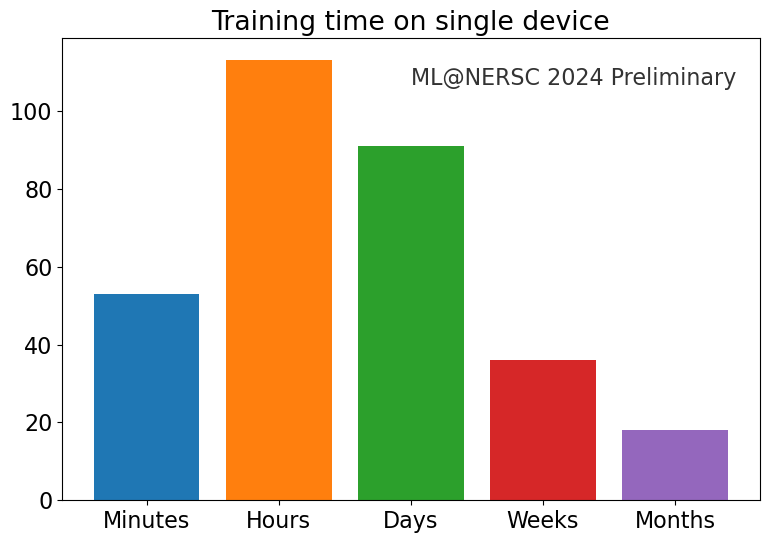

In [34]:
time_x = ['Minutes', 'Hours', 'Days', 'Weeks', 'Months'] #, 'Years']
time_y = time_counts[time_x]

# Make the plot
fig, ax = plt.subplots()

ax.bar(time_x, time_y, color=colors)
ax.set_title('Training time on single device')
ax.text(0.5, 0.9, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## Do you use or plan to use distributed training?

In [35]:
data.columns[25]

'Do you use or plan to use distributed training?'

In [36]:
responses = data.iloc[:,25]
responses

0      Data parallelism, Model parallelism, Pipeline ...
1          Hybrid parallelism (combination of the above)
2                                       Data parallelism
3                                   Pipeline parallelism
4                                      Model parallelism
                             ...                        
197                                     Data parallelism
198                                                  NaN
199                                     Data parallelism
200                                     Data parallelism
201                                                  NaN
Name: Do you use or plan to use distributed training?, Length: 202, dtype: object

In [37]:
distmodes = split_multi_response(responses)

# Simplify some of the labels here
distmodes = distmodes.str.replace(
    'Hybrid parallelism (combination of the above)',
    'Hybrid parallelism', regex=False)
distmodes = distmodes.str.replace(
    "I don't need distributed training (single node or device is sufficient)",
    "Not needed", regex=False)

In [38]:
dist_counts = distmodes.value_counts(ascending=True)
dist_counts

Do you use or plan to use distributed training?
Not sure.                                                                         1
I use Dask to support concurrent fitness evaluations for deep learner models      1
I want to learn how to do this                                                    1
Although my plans are evolving                                                    1
Need some type of parallelism                                                     1
Pipeline parallelism                                                             29
Hybrid parallelism                                                               43
Not needed                                                                       49
Model parallelism                                                                70
Data parallelism                                                                101
Name: count, dtype: int64

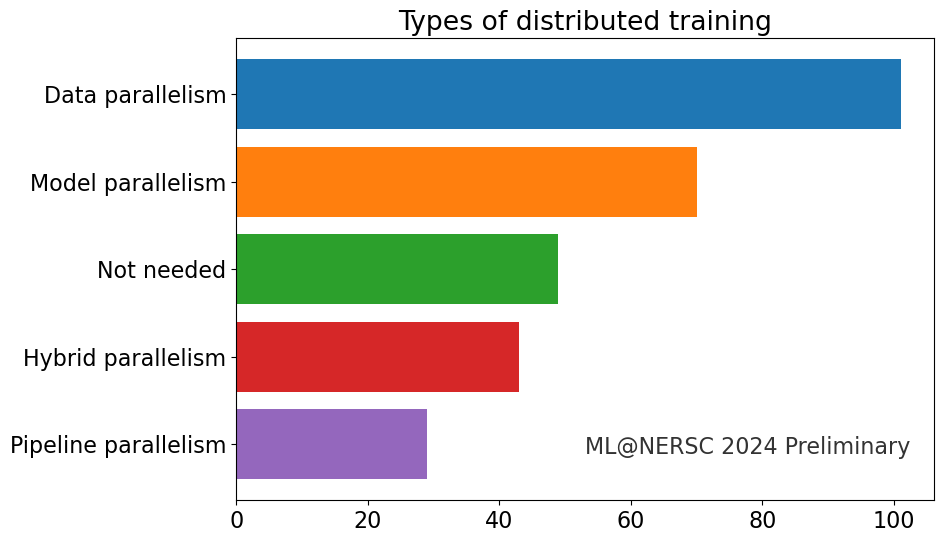

In [39]:
# Filter rare responses
dist_counts = dist_counts[dist_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(dist_counts.index, dist_counts, color=colors[:len(dist_counts)][::-1])
ax.set_title('Types of distributed training')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## Which distributed training libraries do you use?

In [40]:
data.columns[26]

'Which (if any) distributed training libraries do you use?'

In [41]:
distlibs = data.iloc[:,26]

# Simplify some labels
distlibs = distlibs.str.replace(
    'Framework built-in libraries (tensorflow.distributed, pytorch DistributedDataParallel)',
    'Framework built-in',
    regex=False
)

distlibs = split_multi_response(distlibs)

# Combine some bins
distlibs[distlibs.str.contains('mpi', case=False)] = 'MPI'
distlibs[distlibs.str.contains('Distributed.jl')] = 'Framework built-in'

In [42]:
distlibs_counts = distlibs.value_counts(ascending=True)
distlibs_counts

Which (if any) distributed training libraries do you use?
ColossalAI              1
NeMo                    3
Megatron-LM             3
Ray SGD / Ray Train    10
Horovod                14
DeepSpeed              18
Framework built-in     93
Name: count, dtype: int64

In [43]:
# Filter rare responses
#distlibs_counts = distlibs_counts[distlibs_counts > 1]

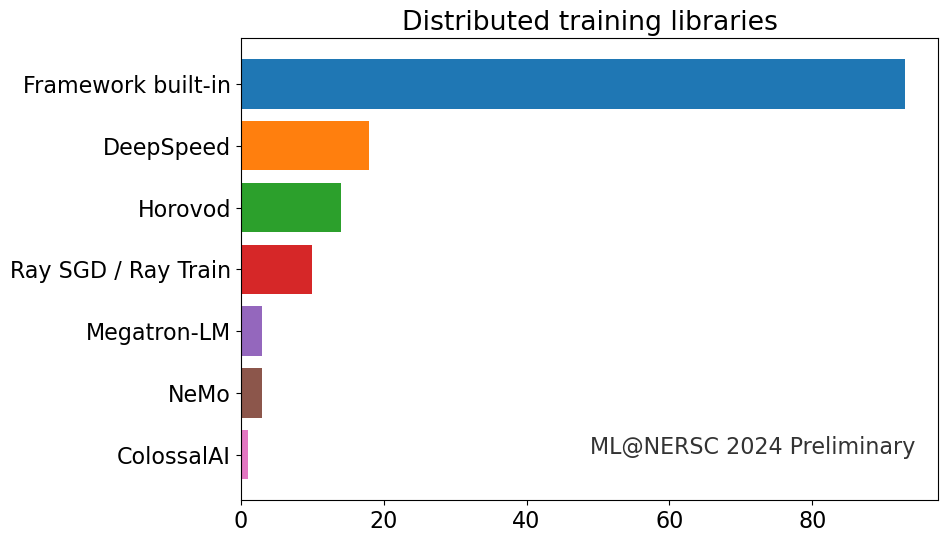

In [44]:
# Make the plot
fig, ax = plt.subplots()

ax.barh(distlibs_counts.index, distlibs_counts, color=colors[:len(distlibs_counts)][::-1])
ax.set_title('Distributed training libraries')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## On how many devices do you typically train a model?

In [45]:
data.columns[27]

'On how many devices do you typically train a model?'

In [46]:
responses = data.iloc[:,27]
trainscale = split_multi_response(responses)
trainscale_counts = trainscale.value_counts(ascending=False)
trainscale_counts

On how many devices do you typically train a model?
Single    124
2-8        80
10s        29
100s       19
1000s       4
Name: count, dtype: int64

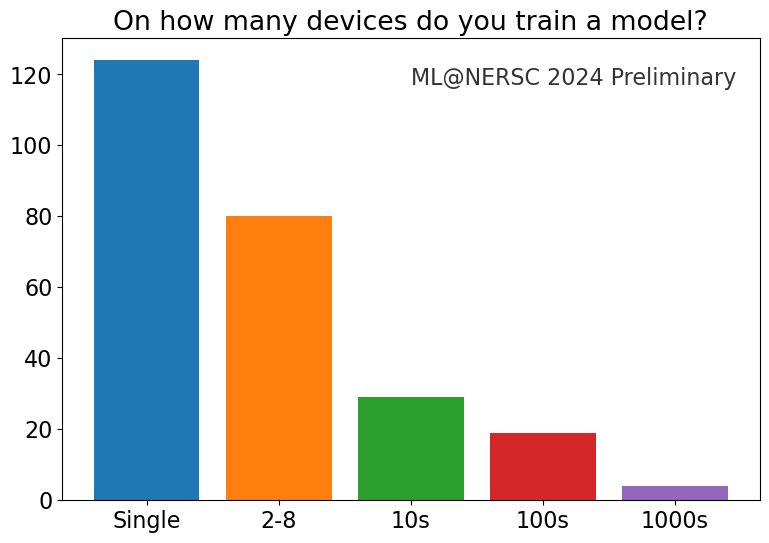

In [47]:
# Make the plot
fig, ax = plt.subplots()

ax.bar(trainscale_counts.index, trainscale_counts, color=colors)
ax.set_title('On how many devices do you train a model?')
ax.text(0.5, 0.9, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## What sizes are your training datasets?

In [48]:
data.columns[32]

'What sizes are your training datasets?'

In [49]:
responses = data.iloc[:,32]
datasizes = split_multi_response(responses)
datasizes

0       100s of GB
0          1-10 TB
1       100s of GB
2       100s of GB
3        10s of GB
          ...     
200    Up to 10 GB
200      10s of GB
201     100s of GB
201        1-10 TB
201      10s of TB
Name: What sizes are your training datasets?, Length: 350, dtype: object

In [50]:
datasize_counts = datasizes.value_counts()

In [51]:
datasize_counts.index

Index(['100s of GB', '10s of GB', 'Up to 10 GB', '1 GB or less', '1-10 TB',
       '10s of TB', '>100 TB'],
      dtype='object', name='What sizes are your training datasets?')

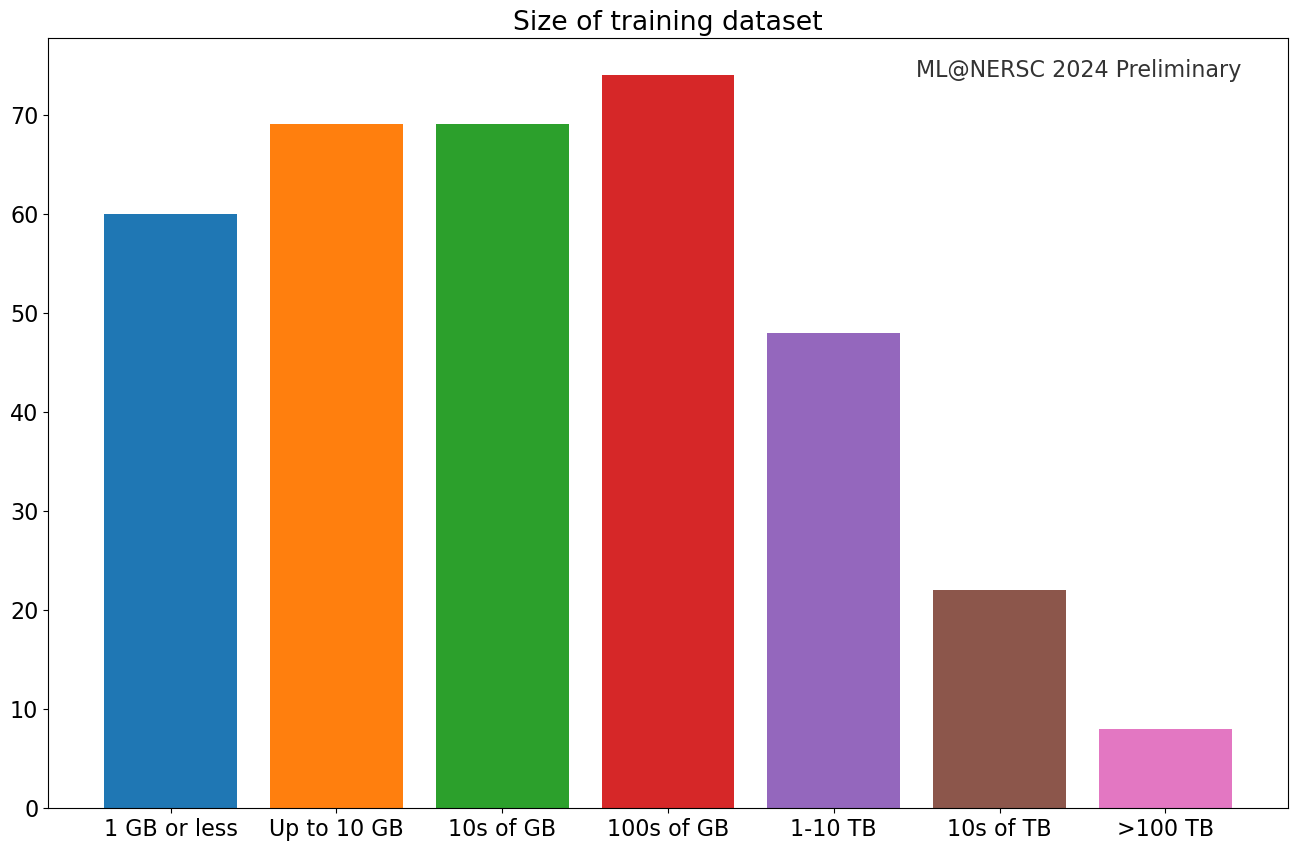

In [52]:
datasize_x = ['1 GB or less', 'Up to 10 GB', '10s of GB',
              '100s of GB', '1-10 TB', '10s of TB', '>100 TB']
datasize_y = datasize_counts[datasize_x]

# Make the plot
fig, ax = plt.subplots(figsize=(16, 10))

ax.bar(datasize_x, datasize_y, color=colors)
ax.set_title('Size of training dataset')
ax.text(0.7, 0.95, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);

## What ML software do you use at NERSC?

In [53]:
data.columns[34]

'What ML software installation setup do you use at NERSC (if relevant)?'

In [54]:
softwares = data.iloc[:,34]

# Simplify some labels
softwares = softwares.str.replace(
    'NERSC modules (TensorFlow, PyTorch, Anaconda)',
    'NERSC modules',
    regex=False
).str.replace(
    'Prebuilt binaries (conda, pip, etc)',
    'Prebuilt binaries',
    regex=False
)

softwares = split_multi_response(softwares)

In [55]:
softwares

0          NERSC modules
0      Prebuilt binaries
2          NERSC modules
2      Prebuilt binaries
4      Build from source
             ...        
199           Containers
200        NERSC modules
200    Prebuilt binaries
200    Build from source
201        NERSC modules
Name: What ML software installation setup do you use at NERSC (if relevant)?, Length: 273, dtype: object

In [56]:
sw_counts = softwares.value_counts(ascending=True)
sw_counts

What ML software installation setup do you use at NERSC (if relevant)?
Looking to migrate workload to NERSC      1
Trying to figure out an R setup           1
'                                         1
Containers                               27
Build from source                        38
Prebuilt binaries                       100
NERSC modules                           105
Name: count, dtype: int64

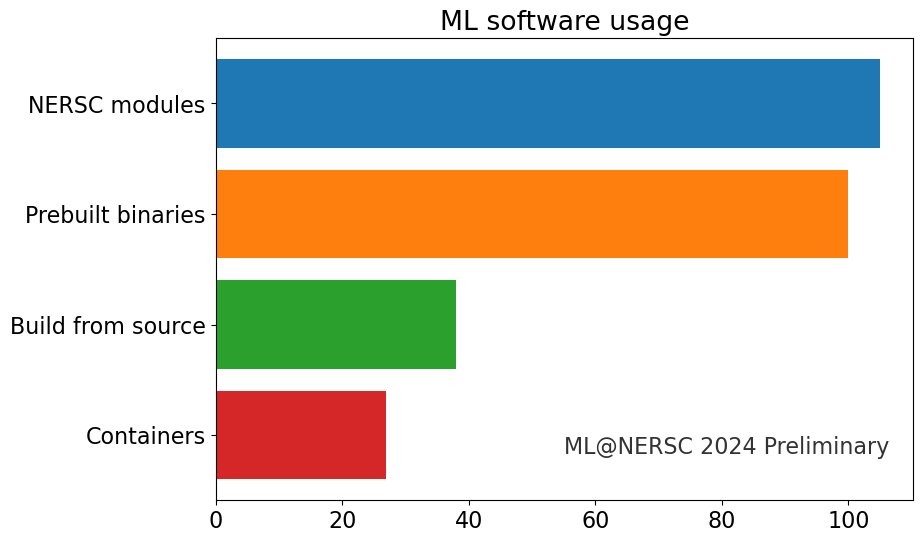

In [57]:
# Filter rare responses
sw_counts = sw_counts[sw_counts > 1]

# Make the plot
fig, ax = plt.subplots()

ax.barh(sw_counts.index, sw_counts, color=colors[:len(sw_counts)][::-1])
ax.set_title('ML software usage')
ax.text(0.5, 0.1, 'ML@NERSC 2024 Preliminary', alpha=0.8, transform=ax.transAxes);